In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
nobel = pd.read_csv("nobel.csv")

In [6]:
nobel.head(5)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


In [13]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
bin_names = ['First', 'Second' , 'Third', "Forth", "Fifth", "Sixth", "Seventh", "Eighth", "Ninth"]
nobel["decade"] = pd.cut(nobel["age_get_prize"], bin_edges, labels=bin_names)

In [16]:
nobel

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,decade
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56,Sixth
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49,Fifth
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37,Forth
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51,Sixth
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44,Fifth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Peter,Handke,AT,NaN,male,2019,literature,1,NaN,NaN,NaN,Dec,78,77,Eighth
919,Abiy,Ahmed Ali,ET,NaN,male,2019,peace,1,NaN,NaN,NaN,Aug,44,43,Fifth
920,Abhijit,Banerjee,IN,NaN,male,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Feb,59,58,Sixth
921,Esther,Duflo,FR,NaN,female,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Oct,48,47,Fifth


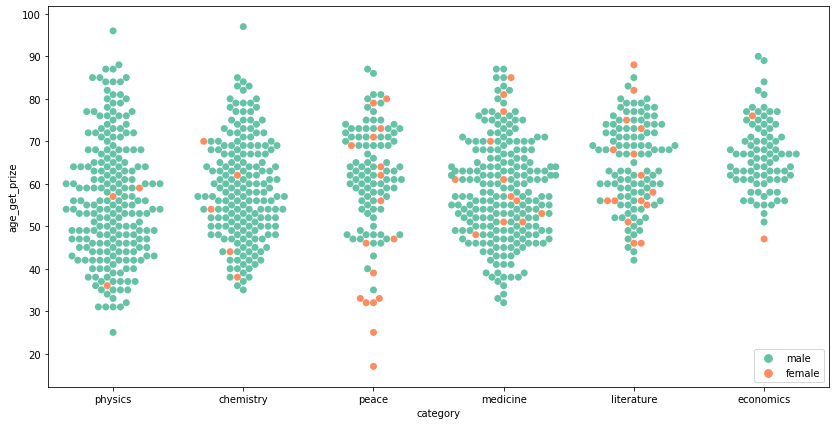

In [79]:
plt.figure(figsize = (14, 7))
sns.swarmplot(x= "category", y= "age_get_prize", hue="gender",size= 7, palette="Set2", data= nobel)
plt.legend(loc= "lower right")
plt.show()